<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/ModuleG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.4 Simpson's Rule

- Simpson's Rule is a numerical integration technique that approximates the definite integral of a function.
- It works by approximating the integrand on each subinterval with a quadratic polynomial.
- In its composite form, the interval [a, b] is divided into an even number (n) of subintervals of equal width (h).
- The approximation is given by:
  h/3 * [f(x0) + 4f(x1) + 2f(x2) + 4f(x3) + ... + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n)]
- Simpson's Rule generally provides higher accuracy (order O(h^4)) compared to simpler methods like the trapezoidal rule for smooth functions.


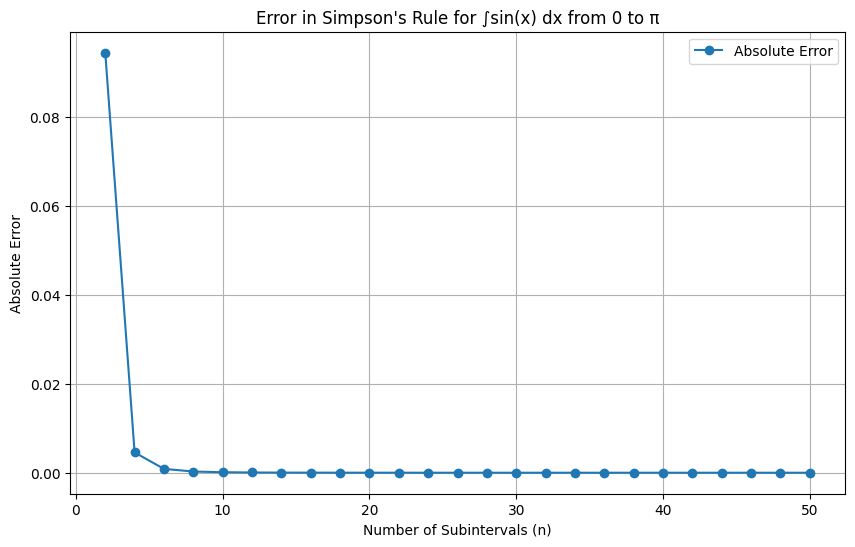

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simpsons_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    S = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-1:2])
    return S * h / 3

f = lambda x: np.sin(x)
a, b = 0, np.pi
exact_value = 2.0

n_values = np.arange(2, 52, 2)
errors = [abs(simpsons_rule(f, a, b, n) - exact_value) for n in n_values]

plt.figure(figsize=(10,6))
plt.plot(n_values, errors, 'o-', label="Absolute Error")
plt.xlabel("Number of Subintervals (n)")
plt.ylabel("Absolute Error")
plt.title("Error in Simpson's Rule for ∫sin(x) dx from 0 to π")
plt.legend()
plt.grid(True)
plt.show()




---



# 21.5 Computing Integrals in Python

- This approach simplifies integration compared to implementing methods such as Simpson's Rule manually.

- The example below computes the integral of sin(x) from 0 to π using SciPy's quad function.


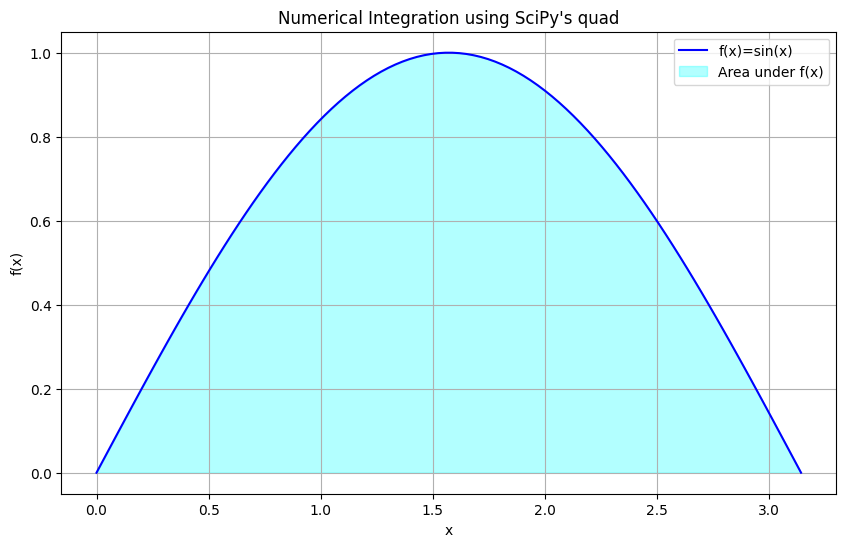

Computed integral: 2.0
Estimated error: 2.220446049250313e-14
Exact value: 2.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

f = lambda x: np.sin(x)
a, b = 0, np.pi
integral_value, error_estimate = quad(f, a, b)
exact_value = 2.0

x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals, label='f(x)=sin(x)', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.3, label='Area under f(x)', color='cyan')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Numerical Integration using SciPy's quad")
plt.legend()
plt.grid(True)
plt.show()

print("Computed integral:", integral_value)
print("Estimated error:", error_estimate)
print("Exact value:", exact_value)
